## Scipy: computação científica de alto nível

O pacote scipy contém várias caixas de ferramentas dedicadas a questões comuns em computação científica. Seus diferentes submódulos correspondem a diferentes aplicações, como interpolação, integração, otimização, processamento de imagens, estatísticas, funções especiais, etc.


#### Funções especiais: `scipy.special`

In [1]:
from scipy import special

In [2]:
special.gamma(4+1)

24.0

In [3]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

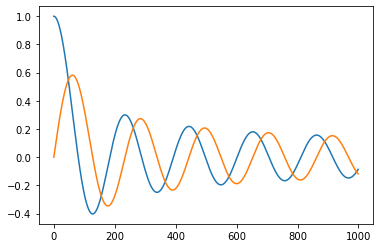

In [4]:
plt.plot(special.j0(np.linspace(0,30,1000)))
plt.plot(special.j1(np.linspace(0,30,1000)))


#### Operações de álgebra linear: `scipy.linalg`

In [5]:
from scipy import linalg

In [6]:
mat = np.asarray([[1,2],[3,4]])

In [7]:
linalg.det(mat)

-2.0

In [8]:
linalg.eigvals(mat)

array([-0.37228132+0.j,  5.37228132+0.j])

In [9]:
linalg.eig(mat)

(array([-0.37228132+0.j,  5.37228132+0.j]),
 array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

In [10]:
linalg.inv(mat)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [11]:
np.dot(linalg.inv(mat),mat)

array([[1.00000000e+00, 0.00000000e+00],
       [2.22044605e-16, 1.00000000e+00]])


#### Interpolação: `scipy.interpolate`

In [12]:
from scipy import interpolate

In [13]:
time = np.linspace(0,2*np.pi,10)
sin  = np.sin(time)+0.1*np.random.randn(10)

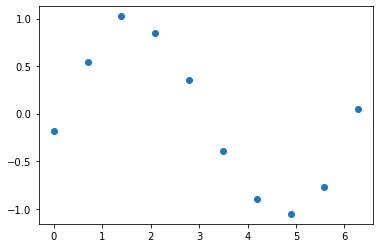

In [14]:
plt.plot(time,sin,'o')

In [15]:
inter_sin = interpolate.interp1d(time,sin)

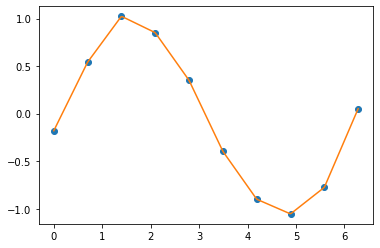

In [16]:
plt.plot(time,sin,'o')
plt.plot(np.linspace(0,2*np.pi,200),
         inter_sin(np.linspace(0,2*np.pi,200)))

In [17]:
inter3_sin = interpolate.interp1d(time,sin,kind='cubic')

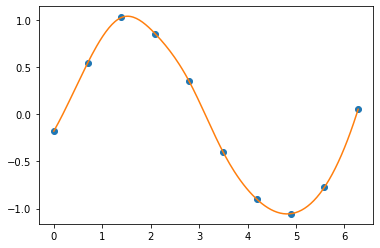

In [18]:
plt.plot(time,sin,'o')
plt.plot(np.linspace(0,2*np.pi,200),
         inter3_sin(np.linspace(0,2*np.pi,200)))


#### Otimização e ajuste: `scipy.optimize`

In [19]:
from scipy import optimize

In [20]:
time = np.linspace(0,np.pi,50)
sin  = 5.5*np.sin(3*time)+np.random.randn(50)

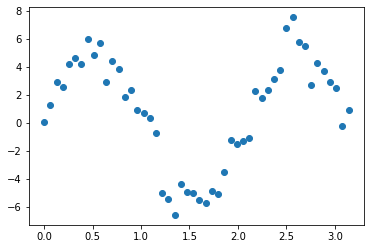

In [21]:
plt.plot(time,sin,'o')

In [22]:
def sin_func(t, a, omega):
    return(a*np.sin(omega*t))

In [23]:
p, pcov = optimize.curve_fit(f=sin_func,xdata=time,ydata=sin,p0=[0,2.5],method='lm')

In [24]:
perr = np.sqrt(np.diag(pcov))

In [25]:
perr

array([0.2089745 , 0.02026141])

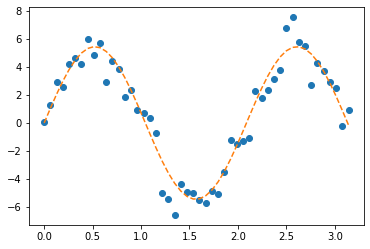

In [26]:
plt.plot(time,sin,'o')
plt.plot(time,sin_func(time,*p),'--')


#### Encontrando o mínimo de uma função escalar

In [27]:
def f(x):
    return(x**2 + 10*np.sin(x))

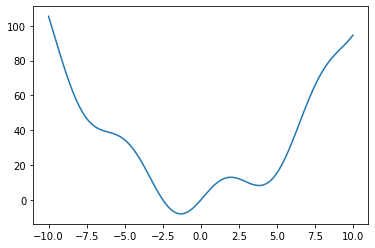

In [28]:
plt.plot(np.linspace(-10,10,100),f(np.linspace(-10,10,100)))

In [29]:
optimize.minimize(f, x0=5)

      fun: 8.31558557947746
 hess_inv: array([[0.11879106]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([3.83746712])

In [30]:
optimize.minimize(f, x0=-7)

      fun: -7.945823375615279
 hess_inv: array([[0.08576577]])
      jac: array([-2.98023224e-07])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 5
     njev: 11
   status: 0
  success: True
        x: array([-1.30644003])


#### Encontrando as raízes de uma função escalar

In [31]:
optimize.root(f,-5,method='lm')

   cov_x: array([[0.01]])
    fjac: array([[-10.00000001]])
     fun: array([0.])
    ipvt: array([1], dtype=int32)
 message: 'The cosine of the angle between func(x) and any column of the\n  Jacobian is at most 0.000000 in absolute value'
    nfev: 64
     qtf: array([0.])
  status: 4
 success: True
       x: array([0.])


#### Integração numérica: `scipy.integrate`

In [32]:
from scipy import integrate

In [33]:
integrate.quad(np.sin,0,2*np.pi)

(2.221501482512777e-16, 4.3998892617845996e-14)


#### Integrando equações diferenciais

In [34]:
def diff_exp(y,t):
    return(2*y)

In [35]:
t = np.linspace(0, 4, 40)
y = integrate.odeint(diff_exp,y0=1,t=t)

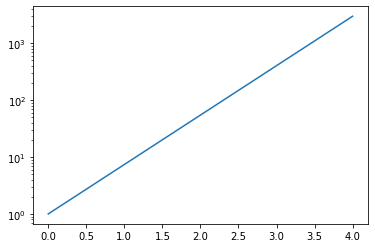

In [36]:
plt.semilogy(t,y)

In [40]:
def diff_osc(ys,t):
    return(ys[1],-4*ys[0])

In [41]:
t = np.linspace(0, 10, 100)
ys = integrate.odeint(diff_osc,y0=(0,1),t=t)

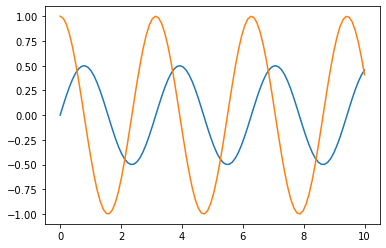

In [42]:
plt.plot(t,ys.T[0])
plt.plot(t,ys.T[1])

In [43]:
def diff_osc_d(ys,t):
    return(ys[1],-4*ys[0]-0.5*ys[1])

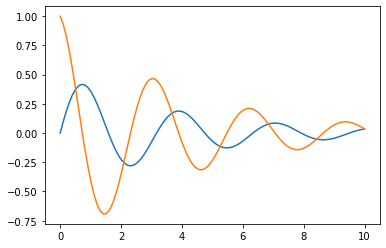

In [44]:
t = np.linspace(0, 10, 100)
ys = integrate.odeint(diff_osc_d,y0=(0,1),t=t)
plt.plot(t,ys.T[0])
plt.plot(t,ys.T[1])